# Data examination
## Correlation lenghts

The data is found in the following files:

- Computation results: `read.csv("..\\..\\data\\results.csv", header = TRUE, sep = ",")`
- Fit data: `read.csv("..\\..\\data\\results_fit.csv", header = TRUE, sep = ",")`
- Correlation lenghths: `read.csv("..\\..\\data\\results_corr.csv", header = TRUE, sep = ",")`
- Correlation functions: `read.csv(paste("..\\..\\data\\plot_data\\correlation_", index, ".csv", sep = ""), header = FALSE)`

In [46]:
# Presenting the correlation lenght data in a simple table
results <- read.csv("..\\..\\data\\results.csv", header = TRUE, sep = ",")
fit <- read.csv("..\\..\\data\\results_fit.csv", header = TRUE, sep = ",")
corr <- read.csv("..\\..\\data\\results_corr.csv", header = TRUE, sep = ",")

d <- corr[, !(names(corr) %in% c("m12", "m23", "m13"))]
d$corr12 <- round(d$corr12, digits = 1)
d$corr23 <- round(d$corr23, digits = 1)
d$corr13 <- round(d$corr13, digits = 1)
d$fit <- round(fit$corr, digits = 1)
temps <- c()
max_ts <- c()
for (index in d$index) {
	temps <- append(temps, results$temp[results$index == index])
	max_ts <- append(max_ts, results$t[results$index == index])
}
d$temp <- temps
d$max_t <- max_ts
d

index,corr12,corr23,corr13,fit,temp,max_t
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,NaN,4.8,23.7,-9117313.8,0.020000,36
1,21.7,7.1,14.0,14.6,0.025118,36
2,10.4,NaN,NaN,15.7,0.031622,36
3,NaN,14.7,NaN,39457.6,0.039810,36
4,NaN,4.0,13.0,-1723929.6,0.050118,36
5,NaN,16.5,43.4,37.7,0.063095,36
6,29.3,17.6,17.4,21.2,0.079432,36
7,12.1,NaN,NaN,14.4,0.100000,36
8,NaN,NaN,NaN,193025.0,0.125890,36


## Correlation function

,index,d,size,x,y,t,temp,comptype,comptime,action,action_error,energy_data,difference_data,correlation_data
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<chr>,<chr>
35,34,3,157464,54,54,54,0.3981,Metropolis Simulation (1000000),8762.356,69952.04,NA,false,false,true


,index,m12,m23,m13,corr12,corr23,corr13
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
35,34,NaN,0.7010329,NaN,NaN,1.426466,NaN


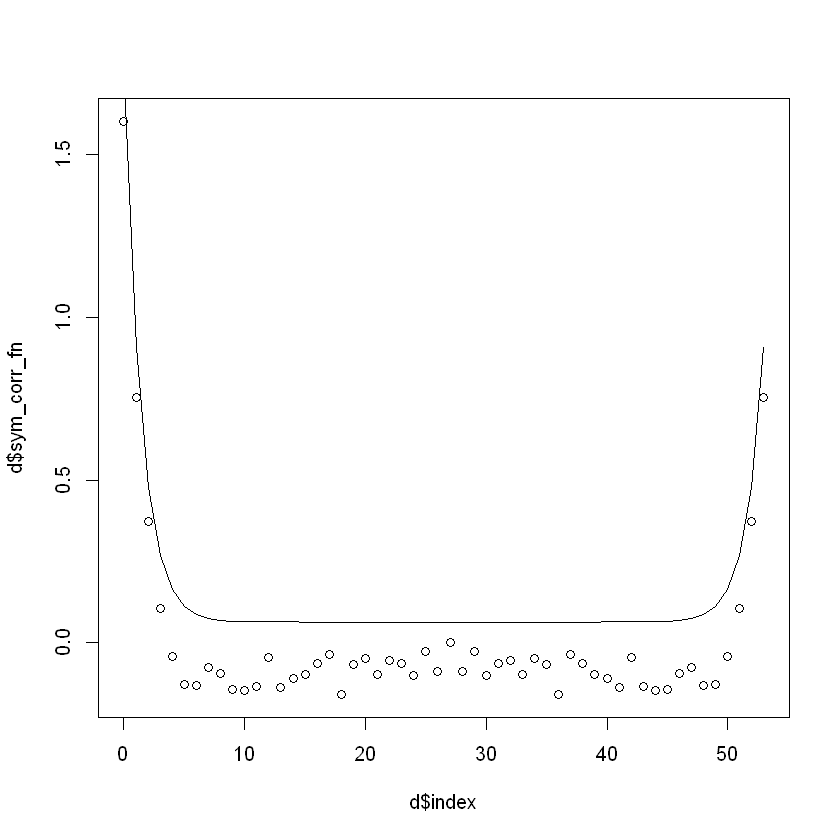

In [47]:
results <- read.csv("..\\..\\data\\results.csv", header = TRUE, sep = ",")
fit <- read.csv("..\\..\\data\\results_fit.csv", header = TRUE, sep = ",")
corr <- read.csv("..\\..\\data\\results_corr.csv", header = TRUE, sep = ",")

index <- 34
d <- read.csv(paste("..\\..\\data\\plot_data\\correlation_", index, ".csv", sep = ""), header = FALSE)
colnames(d) <- c("corr_fn")
d$index <- 1:nrow(d) - 1
d$corr_fn <- d$corr_fn[d$index == (nrow(d) / 2)] - d$corr_fn

d$sym_corr_fn <- d$corr_fn
for (i in 1:(nrow(d) - 1)) {
	d$sym_corr_fn[d$index == i] <- (d$corr_fn[d$index == i] + d$corr_fn[d$index == (nrow(d) - i)]) / 2
}

results[results$index == index, ]
params <- fit[fit$index == index, ]
d$fit <- params$a * cosh(params$m * (d$index - params$n / 2)) + params$b
corr[corr$index == index, ]
plot(d$index, d$sym_corr_fn)
lines(d$index, d$fit)